In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('pyspark example2').getOrCreate() #chaining

# RDD에서 다룰 수 있는 데이터 타입 TypeSafe
1. 비정형 데이터 - ....json, txt, str
2. 정형 데이터 - 리스트, csv, table

In [2]:
rdd1 = spark.sparkContext.textFile('learning_spark_data/log.txt')
rdd1

learning_spark_data/log.txt MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [3]:
rdd1.take(1)

['2025-07-31 10:00:01 INFO User=kim ACTION=LOGIN RESULT=SUCCESS']

In [4]:
#RDD[dict] - data json
import json
rdd2 = spark.sparkContext.textFile('learning_spark_data/data.json').map(json.loads)
rdd2

PythonRDD[5] at RDD at PythonRDD.scala:53

In [5]:
rdd2.take(3)

[{'user': 'kim',
  'action': 'login',
  'result': 'success',
  'time': '2025-07-31 10:00:01'},
 {'user': 'lee',
  'action': 'download',
  'result': 'fail',
  'time': '2025-07-31 10:05:43'},
 {'user': 'park',
  'action': 'upload',
  'result': 'success',
  'time': '2025-07-31 10:08:22'}]

In [6]:
spark.stop()

## RDD의 데이터 읽기 패턴

1. RDD 생성 - type 지정 x
2. 형식 변환 - map()
3. take(n)

# 스파크컨텍스트 객체

1. SparkSession.getOrCreate() -> 세션객체로부터 사전에 설정된 변수에 맞춰 컨텍스트 생성
2. SparkConf + SparkContext -> 저수준 연산에 적합한 방식

In [7]:
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster('local').setAppName('country-student-counts2')
conf

In [8]:
spark = SparkContext(conf = conf).getOrCreate()
#spark.stop()

In [9]:
spark.getConf().getAll()

[('spark.master', 'local'),
 ('spark.executor.id', 'driver'),
 ('spark.app.startTime', '1754270777301'),
 ('spark.driver.extraJavaOptions',
  '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false'),
 ('spark.app.name', 'country-student-counts2'),
 

In [10]:
spark.stop()

In [11]:
import os
os.getcwd() #컨테이너 내부 경로여야 함 

'/home/jovyan/work'

In [12]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
dir

'/home/jovyan/work/learning_spark_data'

In [13]:
filename ='xAPI-Edu-Data.csv'
filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

## 외부저장소에서 데이터를 로드, RDD생성

In [14]:
spark = SparkContext(conf = conf).getOrCreate()

In [15]:
lines = spark.textFile('file:///'+filepath.replace('\\','/'))
lines

file:////home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [16]:
lines.take(2)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M']

In [17]:
lines.count() #대용량일 경우 문제 -> take(n) 일부만 가져와서 봐야 함 

481

# 데이터의 처리 

In [18]:
header = lines.first()
header

'gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class'

In [19]:
datas = lines.filter(lambda row : row != header)
datas.take(3)

['M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L']

In [20]:
countries = datas.map(lambda row : row.split(',')[2])


In [21]:
result = countries.countByValue()
result

defaultdict(int,
            {'KuwaIT': 180,
             'lebanon': 19,
             'Egypt': 9,
             'SaudiArabia': 16,
             'USA': 16,
             'Jordan': 176,
             'venzuela': 1,
             'Iran': 6,
             'Tunis': 9,
             'Morocco': 4,
             'Syria': 6,
             'Iraq': 22,
             'Palestine': 10,
             'Lybia': 6})

In [22]:
result.items()

dict_items([('KuwaIT', 180), ('lebanon', 19), ('Egypt', 9), ('SaudiArabia', 16), ('USA', 16), ('Jordan', 176), ('venzuela', 1), ('Iran', 6), ('Tunis', 9), ('Morocco', 4), ('Syria', 6), ('Iraq', 22), ('Palestine', 10), ('Lybia', 6)])

In [23]:
sorted(result.items(), key = lambda x: x[1],reverse=True)

[('KuwaIT', 180),
 ('Jordan', 176),
 ('Iraq', 22),
 ('lebanon', 19),
 ('SaudiArabia', 16),
 ('USA', 16),
 ('Palestine', 10),
 ('Egypt', 9),
 ('Tunis', 9),
 ('Iran', 6),
 ('Syria', 6),
 ('Lybia', 6),
 ('Morocco', 4),
 ('venzuela', 1)]

In [24]:
sorted(result.items(), key = lambda x: x[1],reverse=True)[:3]

[('KuwaIT', 180), ('Jordan', 176), ('Iraq', 22)]

In [25]:
result.values()

dict_values([180, 19, 9, 16, 16, 176, 1, 6, 9, 4, 6, 22, 10, 6])

In [26]:
sum(result.values())

480

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

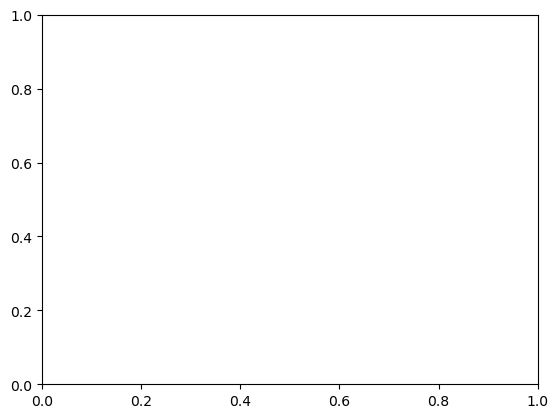

In [27]:
import matplotlib.pyplot as plt
coutries = list(result.keys())
counts = list(result.values())
plt.bar(countries, counts)

In [41]:
spark.stop()

# RDD 생성 - 기본 리스트
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

In [42]:
data = ["KuwaIT", "lebanon", "Jordan", "Jordan", "USA", "Egypt", 
        "Jordan", "USA", "Iran", "Iran", "KuwaIT"]

In [43]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

In [44]:
rdd3 = sc.parallelize(data)
rdd3.collect()

['KuwaIT',
 'lebanon',
 'Jordan',
 'Jordan',
 'USA',
 'Egypt',
 'Jordan',
 'USA',
 'Iran',
 'Iran',
 'KuwaIT']

In [45]:
# 소문자로 변환 lower()
con_low = rdd3.map(lambda x : x.lower())
con_low.collect()

['kuwait',
 'lebanon',
 'jordan',
 'jordan',
 'usa',
 'egypt',
 'jordan',
 'usa',
 'iran',
 'iran',
 'kuwait']

In [46]:
# jordan 추출
con_jo = con_low.filter(lambda x : x == 'jordan')
con_jo.collect()

['jordan', 'jordan', 'jordan']

In [47]:
# 몇개국인지 세어보세요 : distinct() > count()
con_dis = con_low.distinct()
con_dis.count()

6

In [48]:
# 국가별 갯수
country_pairs = con_low.map(lambda x : (x,1))
country_pairs.take(1)

[('kuwait', 1)]

In [49]:
country_count = country_pairs.reduceByKey(lambda a,b: a+b)
country_count.take(6)

[('kuwait', 2),
 ('lebanon', 1),
 ('egypt', 1),
 ('jordan', 3),
 ('usa', 2),
 ('iran', 2)]

In [50]:
country_count.sortByKey().collect()

[('egypt', 1),
 ('iran', 2),
 ('jordan', 3),
 ('kuwait', 2),
 ('lebanon', 1),
 ('usa', 2)]

In [51]:
country_count.sortBy(lambda x:x[1], ascending=False).collect()

[('jordan', 3),
 ('kuwait', 2),
 ('usa', 2),
 ('iran', 2),
 ('lebanon', 1),
 ('egypt', 1)]

In [52]:
rdd3.reduce(lambda a,b:a+','+b) #변환

'KuwaIT,lebanon,Jordan,Jordan,USA,Egypt,Jordan,USA,Iran,Iran,KuwaIT'

In [53]:
rdd3.distinct().collect()

['lebanon', 'Egypt', 'KuwaIT', 'Jordan', 'USA', 'Iran']

# 저장소에 저장하기

In [54]:
output_path = 'output/countries_result'

In [55]:
import shutil

In [56]:
rdd3.saveAsTextFile(output_path) #저장소 경로 

Py4JJavaError: An error occurred while calling o481.saveAsTextFile.
: org.apache.hadoop.mapred.FileAlreadyExistsException: Output directory file:/home/jovyan/work/output/countries_result already exists
	at org.apache.hadoop.mapred.FileOutputFormat.checkOutputSpecs(FileOutputFormat.java:131)
	at org.apache.spark.internal.io.HadoopMapRedWriteConfigUtil.assertConf(SparkHadoopWriter.scala:299)
	at org.apache.spark.internal.io.SparkHadoopWriter$.write(SparkHadoopWriter.scala:71)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopDataset$1(PairRDDFunctions.scala:1091)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopDataset(PairRDDFunctions.scala:1089)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$4(PairRDDFunctions.scala:1062)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1027)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$3(PairRDDFunctions.scala:1009)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:1008)
	at org.apache.spark.rdd.PairRDDFunctions.$anonfun$saveAsHadoopFile$2(PairRDDFunctions.scala:965)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.PairRDDFunctions.saveAsHadoopFile(PairRDDFunctions.scala:963)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$2(RDD.scala:1620)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1620)
	at org.apache.spark.rdd.RDD.$anonfun$saveAsTextFile$1(RDD.scala:1606)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.saveAsTextFile(RDD.scala:1606)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile(JavaRDDLike.scala:564)
	at org.apache.spark.api.java.JavaRDDLike.saveAsTextFile$(JavaRDDLike.scala:563)
	at org.apache.spark.api.java.AbstractJavaRDDLike.saveAsTextFile(JavaRDDLike.scala:45)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:77)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:568)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:833)


In [57]:
if os.path.exists(output_path):
    shutil.rmtree(output_path)
    rdd3.saveAsTextFile(output_path) #저장소 경로

In [ ]:
spark.stop()

# mnm_data.csv를 읽어서 주별 총 사탕수 구하기 

In [62]:
# 1. 스파크 세션(SparkSession) 만들기
from pyspark.sql import SparkSession


# 'mnms count example'이라는 이름으로 스파크 프로그램 시작
spark = SparkSession.builder.appName('mnms count example')\
            .getOrCreate()

In [70]:
# 2. RDD(Resilient Distributed Dataset)로 CSV 파일 불러오기
# 파일 경로는 로컬 디렉토리 또는 HDFS일 수 있음

rdd = spark.sparkContext.textFile('learning_spark_data/mnm_dataset.csv')

In [71]:
# 3. 첫 줄(헤더)을 추출 (예: 'State,Color,Count')
header = rdd.first()

# 4. 첫 줄(헤더)은 제외하고, 나머지 줄을 콤마(,) 기준으로 나눠서 분리
data = rdd.filter(lambda line: line!= header)\
            .map(lambda line: line.split(','))

In [65]:
data.take(3)

[['TX', 'Red', '20'], ['NV', 'Blue', '66'], ['CO', 'Blue', '79']]

In [66]:
rdd1 = data.map(lambda x: (x[0], int(x[2])))
rdd1.take(3)

[('TX', 20), ('NV', 66), ('CO', 79)]

In [67]:
rdd2 = rdd1.reduceByKey(lambda a,b: a+b)
rdd2.take(3)

[('NV', 548477), ('CO', 556302), ('OR', 542169)]

In [68]:
# state, color count
sum = data.map(lambda x: ((x[0], x[1]), int(x[2]))).reduceByKey(lambda a, b: a + b)
sum.take(5)

[(('NV', 'Blue'), 90003),
 (('CO', 'Blue'), 93412),
 (('OR', 'Blue'), 90526),
 (('WA', 'Yellow'), 92920),
 (('OR', 'Green'), 89578)]

In [69]:
# output으로 내보내기
output_path = 'output/mnms_result'

import shutil
if os.path.exists(output_path):
    shutil.rmtree(output_path)
sum.saveAsTextFile(output_path) # 저장소 경로

In [ ]:
!python 02.mnms_result_load.py


In [72]:
spark.stop()

# 짜장면 데이터 

In [73]:
# 1. 스파크 세션(SparkSession) 만들기
from pyspark.sql import SparkSession


# 'mnms count example'이라는 이름으로 스파크 프로그램 시작[
spark = SparkSession.builder.appName('restaurant-revuew-average')\
            .master("local[*]")\
            .getOrCreate()

# 코드 복습해 봐야 함 

In [58]:
filename ='xAPI-Edu-Data.csv'
dir = os.path.join(os.getcwd(), 'learning_spark_data')

filepath = os.path.join(dir, filename)
filepath

'/home/jovyan/work/learning_spark_data/xAPI-Edu-Data.csv'

In [ ]:
dir = os.path.join(os.getcwd(), 'learning_spark_data')
filename ='mnm_dataset.csv'
filepath = os.path.join(dir, filename)
filepath

In [59]:
mnm = spark.sparkContext.textFile('file:///'+filepath.replace('\\','/'))
mnm.take(3)

['gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M',
 'M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M']

In [60]:
data.map(lambda x: ())

AttributeError: 'list' object has no attribute 'map'

In [61]:
data.map(lambda x: ((x[0], x[1]), int(x[2]))).reduceByKey(lambda a,b: a+b)

AttributeError: 'list' object has no attribute 'map'

In [ ]:
spark = SparkContext(conf = conf).getOrCreate()
#spark.stop()